## NO Idea

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [5]:
from fastai.vision import *
from fastai.metrics import *

## Getting Data

In [6]:
path = 'C:/Users/Askar/fastai/dataset/cats-and-dogs'

In [7]:
np.random.seed(42)

In [8]:
data = ImageDataBunch.from_folder(path, train="train", ds_tfms=get_transforms(), size=224, valid_pct=0.2, bs=32, num_workers=4 )
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (501 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cats,cats,cats,cats,cats
Path: C:\Users\Askar\fastai\dataset\cats-and-dogs;

Valid: LabelList (125 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,cats,cats,dogs
Path: C:\Users\Askar\fastai\dataset\cats-and-dogs;

Test: None

## Visualizing

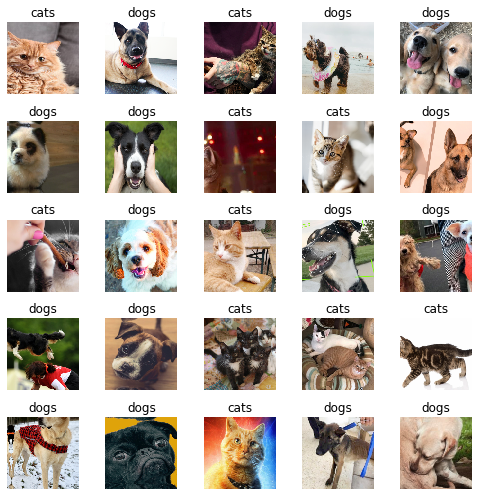

In [9]:
data.show_batch(row=3, figsize=(7,7))

In [10]:
print(data.classes)
len(data.classes)

['cats', 'dogs']


2

## Training Data

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.636152,0.062423,0.024000,01:15
1,0.334772,0.049526,0.024000,01:08
2,0.229206,0.090134,0.024000,00:41
3,0.198558,0.095521,0.032000,00:41
4,0.179522,0.065382,0.024000,00:41
5,0.160209,0.045246,0.024000,00:41
6,0.134548,0.054415,0.024000,00:42
7,0.110053,0.063895,0.032000,00:42
8,0.095106,0.061668,0.032000,00:41
9,0.082751,0.059780,0.024000,00:43


In [13]:
learn.save('stage-1')

## Result

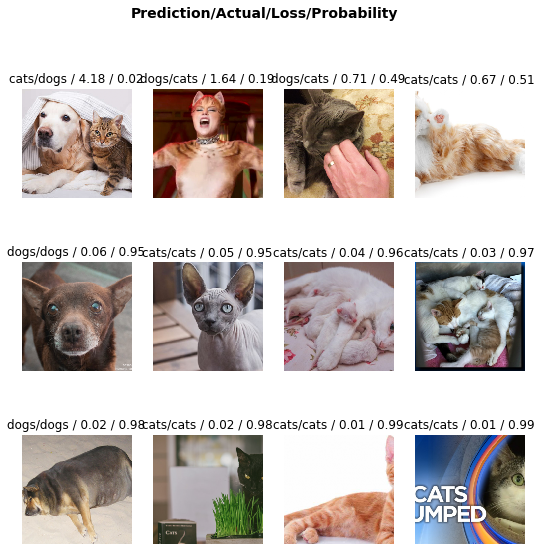

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(12, figsize=(9, 9))

In [15]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.180272,0.363266,0.080000,00:41


In [16]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (501 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cats,cats,cats,cats,cats
Path: C:\Users\Askar\fastai\dataset\cats-and-dogs;

Valid: LabelList (125 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,cats,cats,dogs
Path: C:\Users\Askar\fastai\dataset\cats-and-dogs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2